# Data Analysis - Velib Project in <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>
---

_Authors:_ J. Chevallier (<small>INSA Toulouse</small>), O. Roustant (<small>INSA Toulouse</small>).

We consider the [velib](https://www.velib-metropole.fr/donnees-open-data-gbfs-du-service-velib-metropole) data set, related to the bike sharing system of Paris. The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent.

From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). **The aim is to detect clusters in the data, corresponding to common customer usages.** This clustering should then be used to predict the loading profile.

---

The aim of this tutorial is to reproduce the study we carried out in [Python](https://plmlab.math.cnrs.fr/wikistat/Exploration/-/blob/master/Velib/PT_velib_Python.ipynb) on R.

As before, you can find suggested corrections in the "solutions" file. Try to find the answers yourself first! (that's how we make progress). Unfortunately, in `R` the magic `%load` command does not work, so you will have to retrieve the solutions manually.

In [56]:
rm(list = ls())   # erase everything, start from scratch!

In [57]:
library(ggplot2)
library(reshape2)
library(gridExtra)

In [58]:
# direct loading from stored data on PLMlab
load('data/velib.RData')
summary(velib)

# alternative: load the data from package funFEM, where you have more information (help page)
#library(funFEM)
#data(velib)
#help("velib")

         Length Class      Mode     
data      181   data.frame list     
position    2   data.frame list     
dates     181   -none-     character
bonus    1189   -none-     numeric  
names    1189   -none-     character

ERROR: Error in library(funFEM): aucun package nommé ‘funFEM’ n'est trouvé


In [60]:
# data preparation
loading = as.matrix(velib$data)
colnames(loading) = 1:ncol(loading)
rownames(loading) = velib$names

stations = 1:nrow(loading)
coord = velib$position[stations,]
coord$bonus = velib$bonus[stations]

# select exactly 7 days of data (we remove the first 13 dates)
dates = 14:181
loading = loading[stations, dates]
colnames(loading) = 1:length(dates)

head(loading)
head(coord)
coord


1          2          3          4          5         
 EURYALE DEHAYNIN    0.03846154 0.03846154 0.07692308 0.03846154 0.03846154
 LEMERCIER           0.47826087 0.47826087 0.47826087 0.43478261 0.43478261
 MEZIERES RENNES     0.21818182 0.14545455 0.12727273 0.10909091 0.10909091
 FARMAN              0.95238095 0.95238095 0.95238095 0.95238095 0.95238095
 QUAI DE LA RAPEE    0.92753623 0.81159420 0.73913043 0.72463768 0.72463768
 CHOISY POINT D'IVRY 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
                     6          7          8          9          10         ⋯
 EURYALE DEHAYNIN    0.03846154 0.03846154 0.03846154 0.10714286 0.00000000 ⋯
 LEMERCIER           0.43478261 0.43478261 0.43478261 0.26086957 0.04347826 ⋯
 MEZIERES RENNES     0.10909091 0.09090909 0.09090909 0.05454545 0.10909091 ⋯
 FARMAN              0.95238095 0.95238095 1.00000000 1.00000000 1.00000000 ⋯
 QUAI DE LA RAPEE    0.72463768 0.72463768 0.72463768 0.75362319 0.97101449 ⋯
 CHOISY POINT D'IVRY 0.16666667 0.16666667 0.16666667 0.08333333 0.00000000 ⋯
                     159        160        161       162        163       
 EURYALE DEHAYNIN    0.29629630 0.11111111 0.1111111 0.14814815 0.30769231
 LEMERCIER           0.04347826 0.00000000 0.2173913 0.13043478 0.04545455
 MEZIERES RENNES     0.25925926 0.25925926 0.2037037 0.12962963 0.14814815
 FARMAN              1.00000000 1.00000000 0.9047619 0.85714286 0.85714286
 QUAI DE LA RAPEE    0.22727273 0.45454545 0.5909091 0.83333333 1.00000000
 CHOISY POINT D'IVRY 0.34782609 0.08695652 0.1153846 0.08695652 0.13043478
                     164        165        166        167       168      
 EURYALE DEHAYNIN    0.07692308 0.11538462 0.07692308 0.1538462 0.1538462
 LEMERCIER           0.17391304 0.17391304 0.17391304 0.2608696 0.3913043
 MEZIERES RENNES     0.29629630 0.31481481 0.37037037 0.3703704 0.4074074
 FARMAN              0.85714286 0.76190476 0.76190476 0.7619048 0.7619048
 QUAI DE LA RAPEE    0.81818182 0.63636364 0.71212121 0.6212121 0.5757576
 CHOISY POINT D'IVRY 0.08695652 0.08695652 0.43478261 0.3913043 0.5217391

longitude latitude bonus
19117 2.377389  48.88630 0    
17111 2.317591  48.89002 0    
6103  2.330447  48.85030 0    
15042 2.271396  48.83373 0    
12003 2.366897  48.84589 0    
13038 2.363335  48.82191 0

longitude latitude bonus
19117 2.377389  48.88630 0    
17111 2.317591  48.89002 0    
6103  2.330447  48.85030 0    
15042 2.271396  48.83373 0    
12003 2.366897  48.84589 0    
13038 2.363335  48.82191 0    
17041 2.287667  48.88288 0    
41203 2.455529  48.85013 0    
43401 2.464026  48.81995 0    
5015  2.349983  48.84151 0    
20026 2.400977  48.86793 1    
12127 2.454820  48.83397 0    
1014  2.334058  48.86367 0    
18108 2.368694  48.89509 0    
18112 2.333653  48.89801 0    
17045 2.297831  48.87841 0    
3010  2.354237  48.86246 0    
20011 2.405169  48.85550 0    
4020  2.350148  48.86009 0    
42504 2.341071  48.81444 0    
3001  2.367833  48.85804 0    
4002  2.347356  48.85525 0    
8033  2.309723  48.87279 0    
17023 2.303457  48.89059 0    
17026 2.301138  48.88186 0    
20131 2.389613  48.85936 0    
6007  2.329794  48.84274 0    
3012  2.353661  48.86750 0    
18044 2.328807  48.88413 0    
8113  2.319395  48.87492 0    
⋮     ⋮         ⋮        ⋮    
14019 2.326413  48.82503 0    
31006 2.424446  48.85376 0    
12039 2.400928  48.83481 0    
14003 2.331304  48.83685 0    
13039 2.365470  48.82322 0    
19115 2.386120  48.89849 0    
34011 2.332083  48.91419 0    
4021  2.352581  48.86142 0    
14024 2.305672  48.82799 0    
20035 2.395040  48.86941 1    
22101 2.222189  48.84313 0    
19029 2.374720  48.88680 0    
21503 2.229589  48.87092 0    
1011  2.342303  48.86025 0    
13021 2.342177  48.82604 0    
11020 2.383072  48.85632 0    
8005  2.324430  48.86909 0    
42707 2.361810  48.81237 0    
20004 2.416023  48.84706 0    
20028 2.394469  48.86519 0    
13103 2.360460  48.83773 0    
18047 2.326736  48.89108 0    
1017  2.330567  48.86557 0    
16037 2.262113  48.84518 0    
9008  2.343698  48.87916 0    
18040 2.360216  48.88457 0    
7001  2.316184  48.84777 0    
21209 2.314630  48.81110 1    
43007 2.439893  48.84826 0    
7006  2.331418  48.85894 0

## First Insights into the Dataset

##### <span style="color:purple"> **Todo:** Plot the loading a station</span>

- Plot the load evolution of the $i$-th station over time;
- Draw a vertical line to delimit the days (_**Hint:** How many days do we observe?_);
- Enter the station name in the figure title;
- Label the axes in the figure.

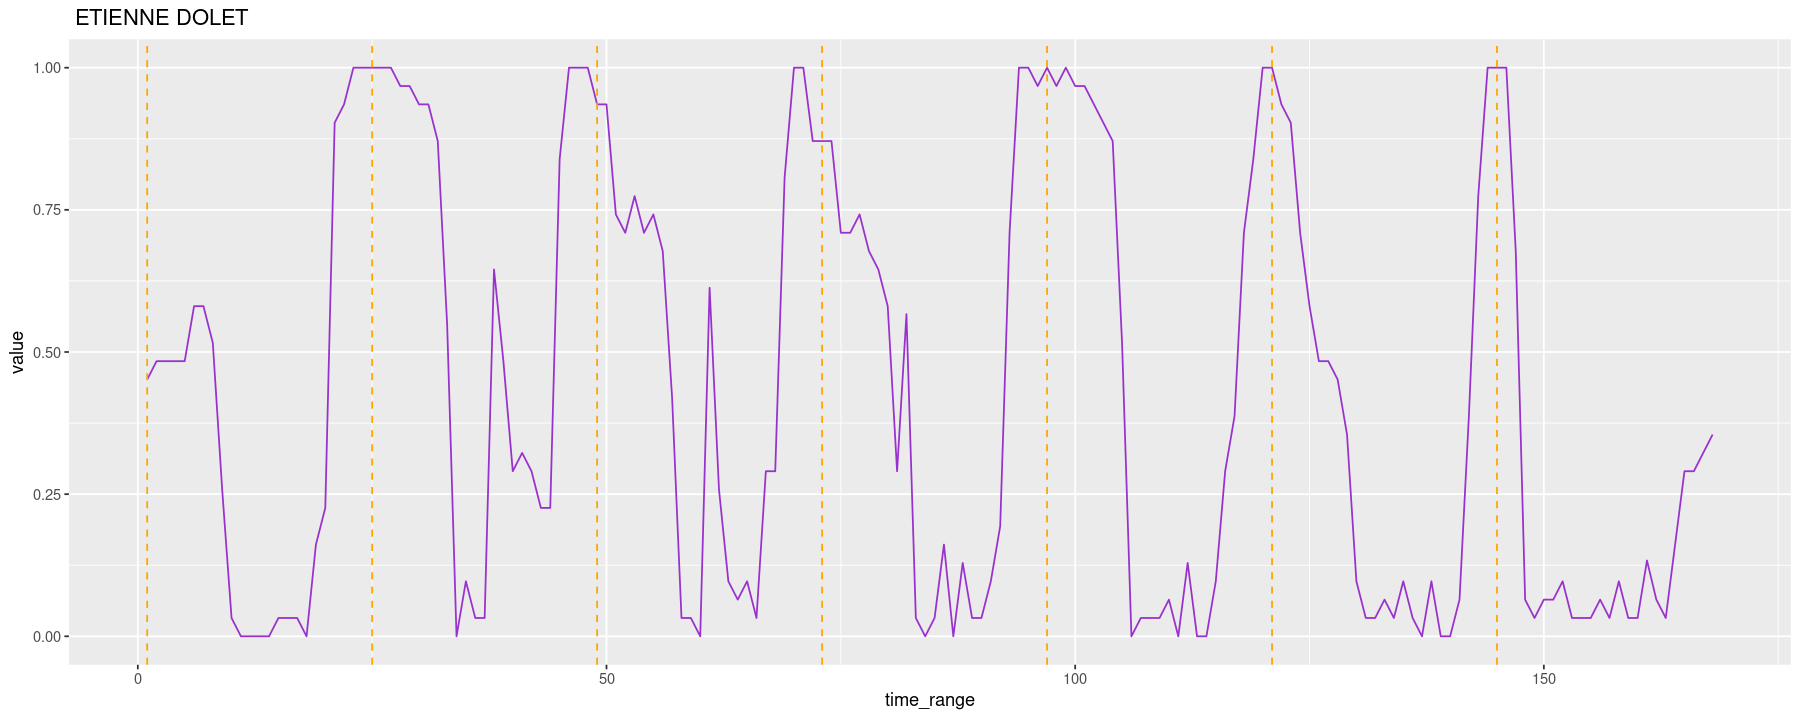

In [64]:
### TO BE COMPLETED ### 

options(repr.plot.width = 15, repr.plot.height = 6)

# --- #
time_tick = 1 + 24*(0:6)  # vector corresponding to the beginning of days
i = sample.int(nrow(loading), 1)
df = melt(loading[i,])  #the function melt reshapes it from wide to long

df$time_range = 1:ncol(loading)

ggplot(df, aes(x=time_range, y=value)) + geom_line(col="darkorchid") +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
    labs(title=velib$names[i])


In [ ]:
# solutions/R/plot_loading.r

> Comments?

##### <span style="color:purple"> **Question:** Does loading differ from one station to another?</span>

 Draw a matrix of plots of size 4*4 corresponding to 16 stations of your choice. _Do not forget the vertical lines corresponding to days_

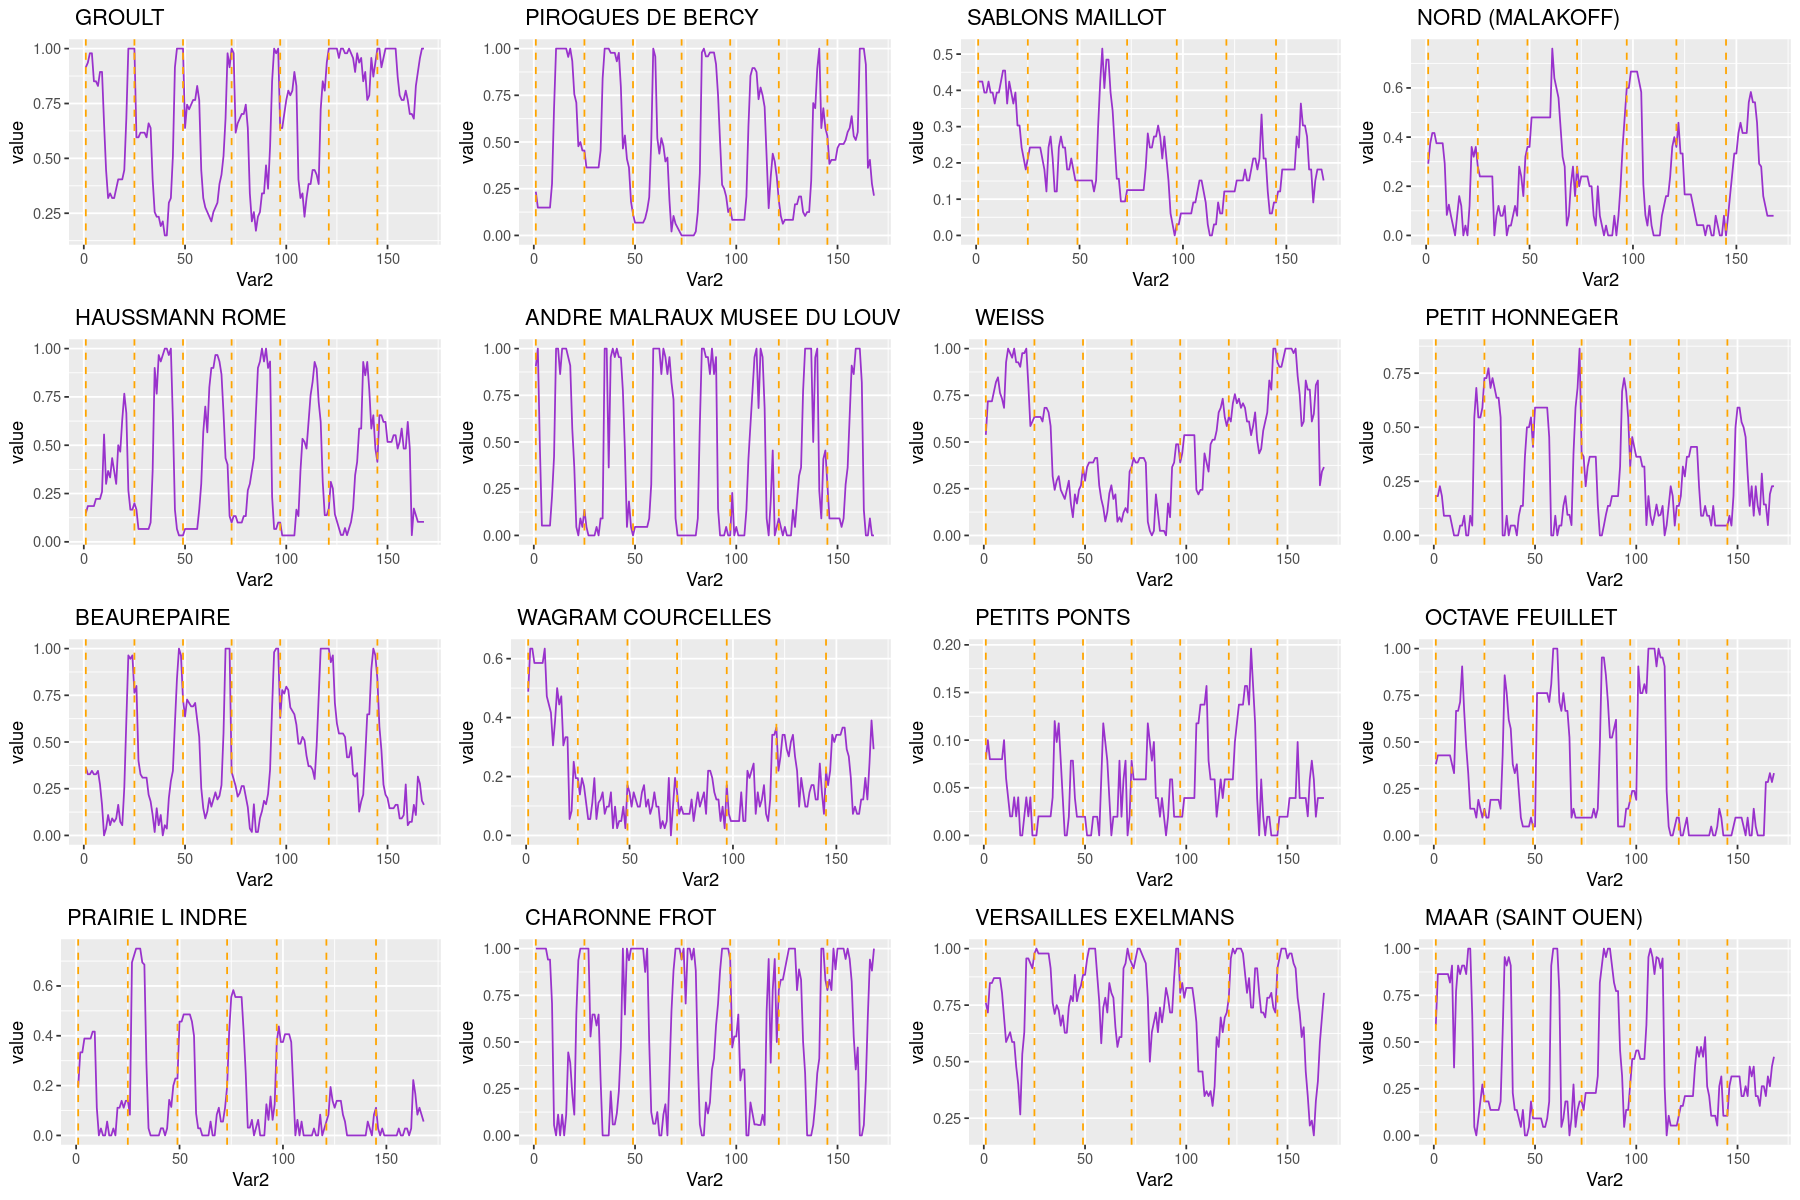

In [79]:
options(repr.plot.width = 15, repr.plot.height = 10)

# --- #

timeTick = 1 + 24*(0:6)  # vector corresponding to the beginning of days

x = loading

# select 16 stations
stations = sample.int(nrow(x), 16)

df = melt(x[stations,])  #the function melt reshapes it from wide to long


p = list()
for (i in 1:16){
    dfi = df[df$Var1 == velib$names[stations[i]],]
    
    p[[i]] = ggplot(dfi, aes(x=Var2, y=value)) + 
        geom_line(col="darkorchid") + 
        geom_vline(xintercept=timeTick, col="orange", linetype="dashed") +
        labs(title=velib$names[stations[i]])
}
do.call(grid.arrange,p)


In [ ]:
# solutions/R/plot_loading_16.r

> Comments?

##### <span style="color:purple"> **Todo:** Draw the boxplot of the variables, sorted in time order.</span>

1. What can you say about the distribution of the variables? 
2. Position, dispersion, symmetry? 
3. Can you see a difference between days?

_Hint:_ To change the graphical properties of boxplots (for example, the thickness of the median), use the [`patch_artist = True`](https://python-charts.com/distribution/box-plot-matplotlib/) argument in the `plt.boxplot` function.

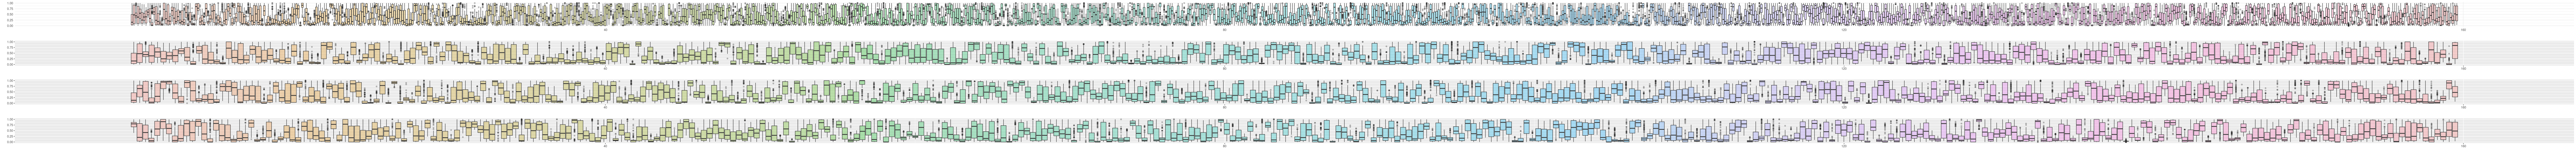

In [88]:
### TO BE COMPLETED ### 

options(repr.plot.width = 100, repr.plot.height = 6)

# --- #

plt.figure(figsize = (20,6))

​

# --- #

​

​

Error in parse(text = x, srcfile = src): <text>:3:25: ',' inattendu(e)
2: 
3: plt.figure(figsize = (20,
                           ^
Traceback:


# Only a third of the data
df = melt(loading[ seq(from=1, to=+floor(nrow(loading)/3)) ,])
p2 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('')

# The next third
df = melt(loading[ seq(from=1+floor(nrow(loading)/3), to=2*floor(nrow(loading)/3)) ,])
p3 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('')

# The remaining third
df = melt(loading[ seq(from=1+2*floor(nrow(loading)/3), to=nrow(loading)) ,])
p4 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('')

# --- #

grid.arrange(p1, p2, p3, p4, nrow=4)



In [71]:
# solutions/R/plot_loading_disp.r

ERROR: Error in eval(expr, envir, enclos): objet 'solutions' introuvable


> Comments?

## Average Loading

##### <span style="color:purple"> **Question:** What is the average station fill rate?</span>

Which station is, on average, the fullest? the least full?

In [89]:
### TO BE COMPLETED ### 

print('--- Average fill rate ---')
print(mean(loading))

# --- #
print('')

print('--- Least crowded station, on average ---')
i = which.min(rowMeans(loading)) 
print(rowMeans(loading)[i])

# --- #
print('')

print('--- Fullest station, on average ---')
i = which.max(rowMeans(loading))
print(rowMeans(loading)[i])

[1] "--- Average fill rate ---"
[1] 0.3816218
[1] ""
[1] "--- Least crowded station, on average ---"
 HORNET (BAGNOLET) 
        0.01613284 
[1] ""
[1] "--- Fullest station, on average ---"
 INSURRECTION AOUT 1944 (IVRY) 
                     0.9193723 


In [ ]:
# solutions/R/loading_mean.r

##### <span style="color:purple"> **Question:** Does the average load vary from one station to another?</span>

- Show the evolution of the average load for each station. 
- On the same graph, plot the average loading for the entire data set.

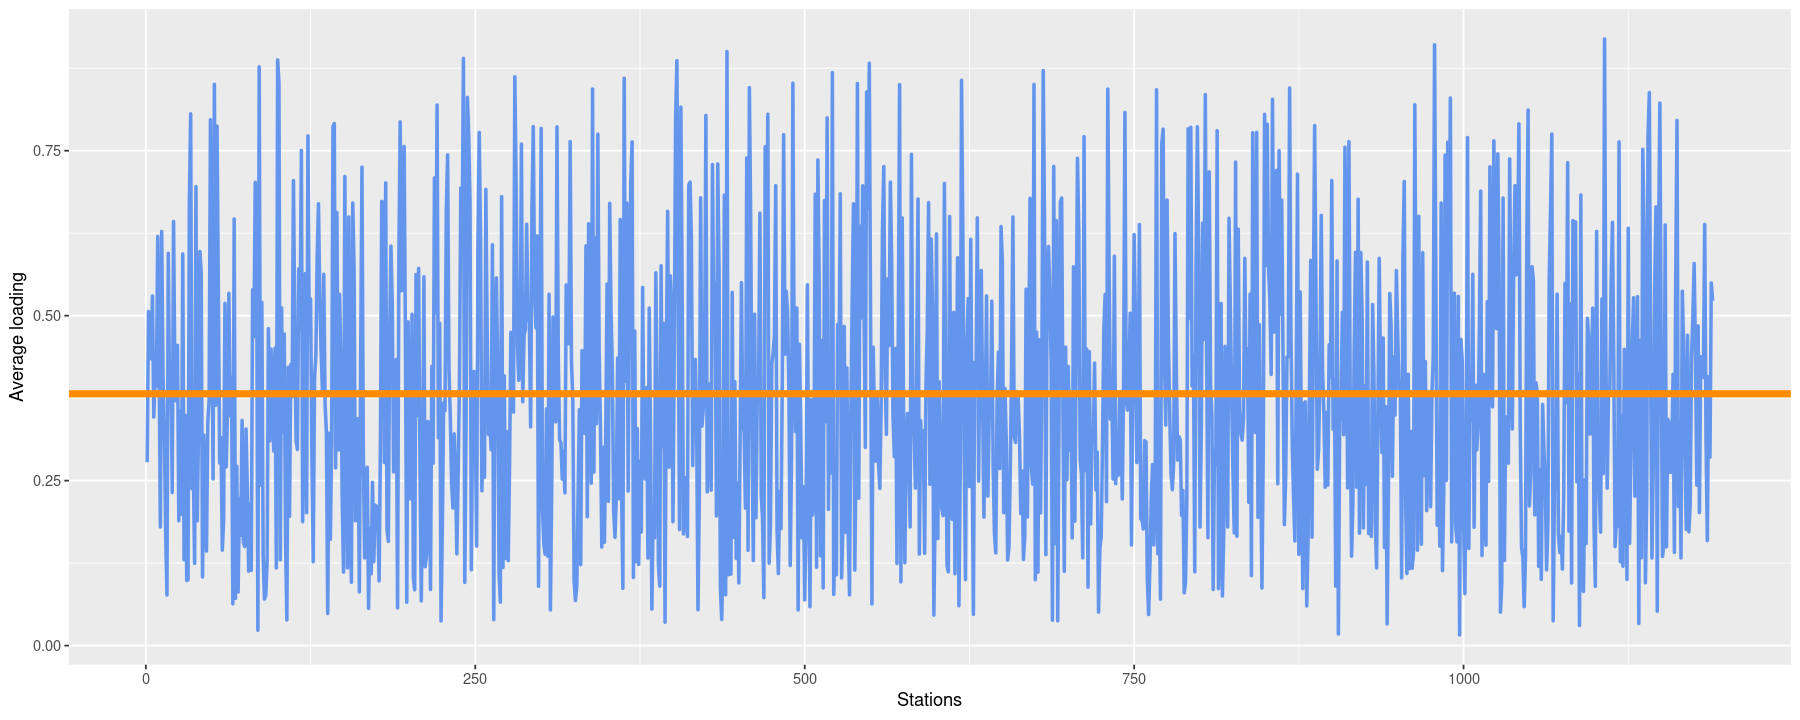

In [91]:
### TO BE COMPLETED ### 
options(repr.plot.width = 15, repr.plot.height = 6)

df = data.frame(stations = c(1:nrow(loading)), mean = rowMeans(loading))
ggplot(df, aes(x = stations, y= mean)) + 
    geom_line(color = 'cornflowerblue', linewidth=1) +
    geom_hline(yintercept = mean(loading), color = 'darkorange', linewidth=2) +
    labs(x = "Stations", y = "Average loading")


In [ ]:
# solutions/R/plot_mean_stations.r

> Comments?

##### <span style="color:purple"> **Question:** Does the average load vary over the course of a day?</span>

Plot the average hourly loading for each day (on a single graph).

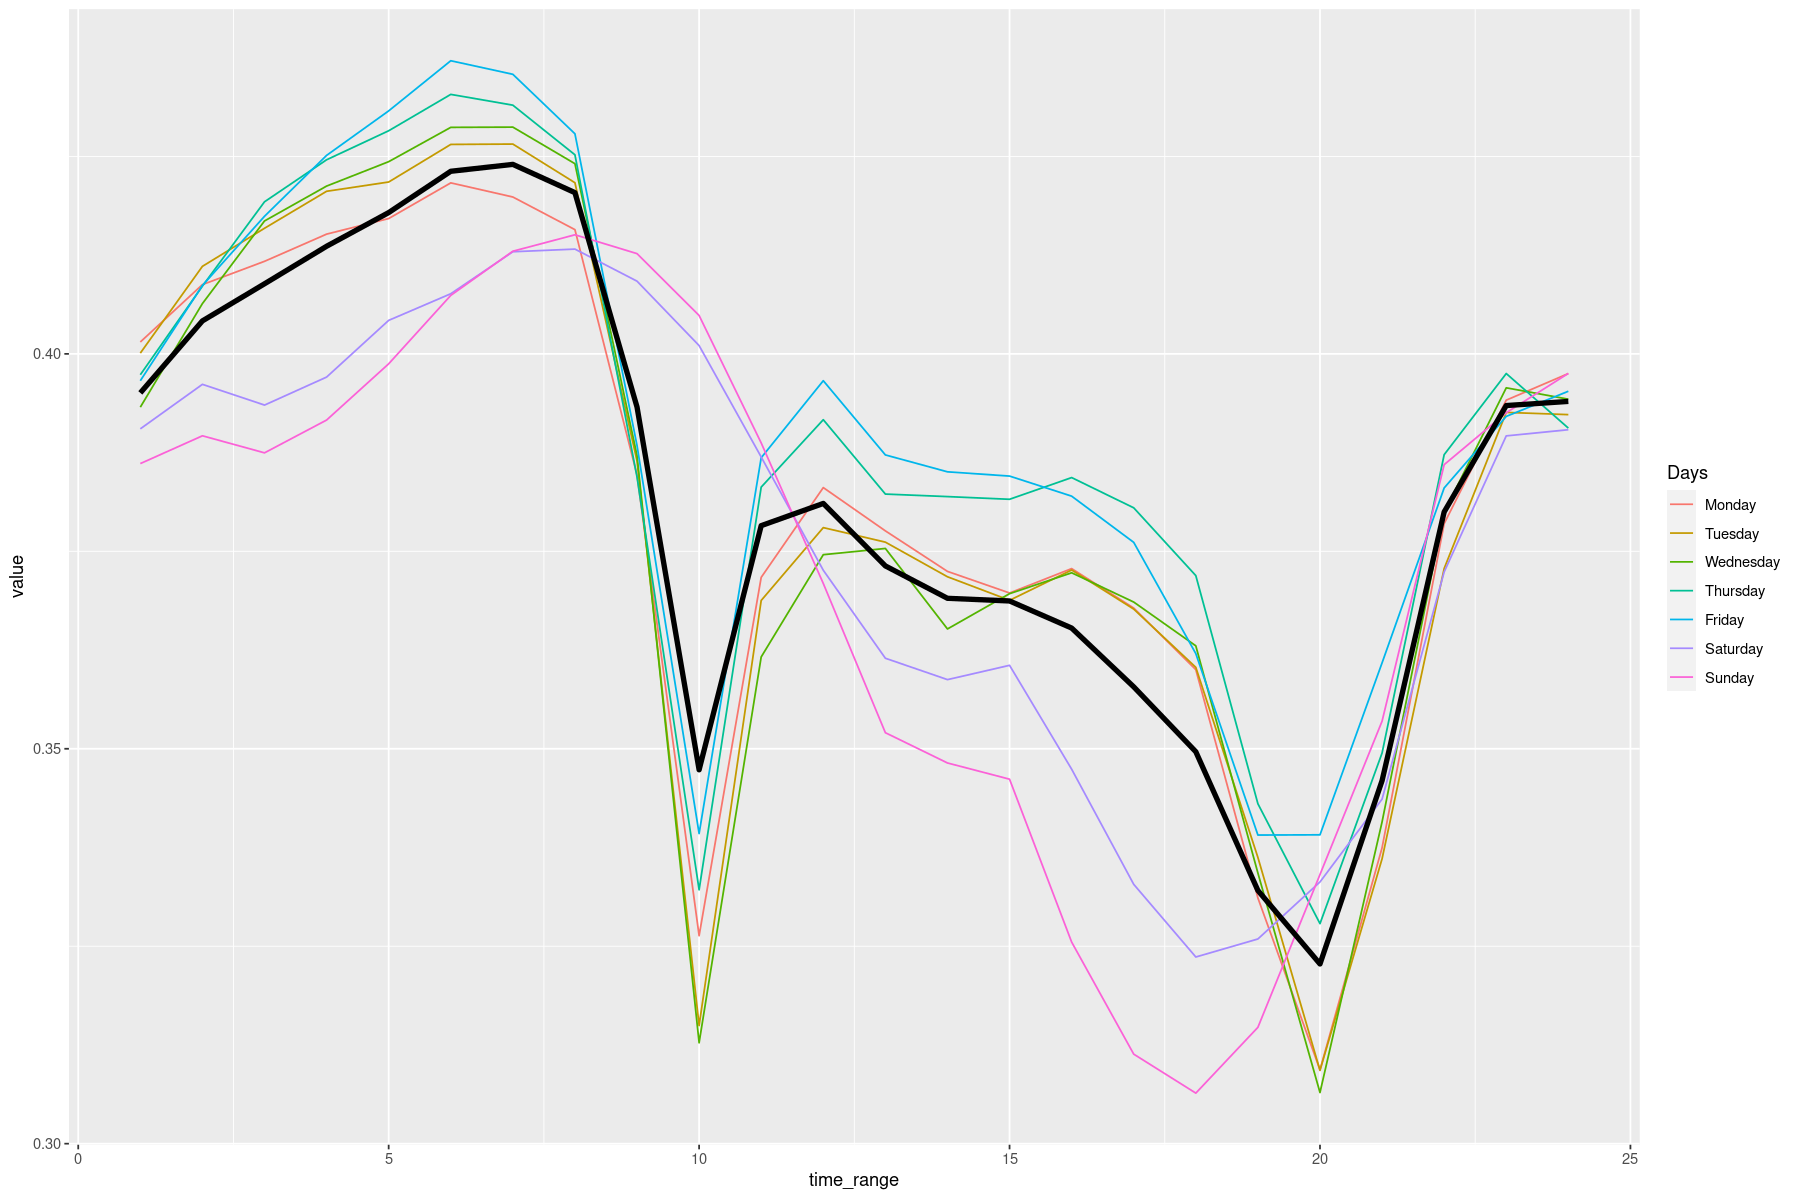

In [92]:
### TO BE COMPLETED ### 
mean_per_hour_per_day = colMeans(loading)
mean_per_hour_per_day = matrix(mean_per_hour_per_day, nrow = 24)
mean_per_hour         = rowMeans(mean_per_hour_per_day)

# --- #

mean_per_hour_per_day            = as.data.frame(mean_per_hour_per_day)
colnames(mean_per_hour_per_day)  = list("Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday")
mean_per_hour_per_day$time_range = c(1:24)
mean_per_hour_per_day            = melt(mean_per_hour_per_day, id='time_range', variable.name='Days')

mean_per_hour            = as.data.frame(mean_per_hour)
colnames(mean_per_hour)  = list("Weekly")
mean_per_hour$time_range = c(1:24)

# --- #

options(repr.plot.width = 15, repr.plot.height = 10)

ggplot() + 
    geom_line(data=mean_per_hour_per_day, aes(x=time_range, y=value, color=Days)) + 
    geom_line(data=mean_per_hour, aes(x=time_range, y=Weekly), linewidth = 1.5)

In [ ]:
# solutions/R/plot_mean_hours.r

> Comments?

## Velib Station Map

In [96]:
install.packages("ggmap")
library(ggmap)

Installation du package dans ‘/home/nmai/R/libs’
(car ‘lib’ n'est pas spécifié)

installation des dépendances ‘sys’, ‘askpass’, ‘curl’, ‘openssl’, ‘png’, ‘jpeg’, ‘httr’


ℹ Google's Terms of Service: <https://mapsplatform.google.com>
  Stadia Maps' Terms of Service: <https://stadiamaps.com/terms-of-service/>
  OpenStreetMap's Tile Usage Policy: <https://operations.osmfoundation.org/policies/tiles/>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.


##### <span style="color:purple"> **Question:** Where are the velib stations located?</span>

- Plot the stations coordinates on a 2D map (latitude _vs._ longitude)
- Use the average hourly loading as a color scale
- You can consider different times of day, for example 6am, 12pm, 11pm on Monday, or the average weekly load at 6am.
- You can consider different days at the same time, or the average load for each day.
- You can use the [`qmplot`](https://rdrr.io/cran/ggmap/man/qmplot.html) function of the [`ggmap`](https://github.com/dkahle/ggmap) to charge the map of Paris

---

_**Note**:_ You will need a Stadia Maps API key to access the tiles in `ggmap`. _It is free_, and you will find a guide to obtaining such a key in the [Stadia Maps documentation](https://docs.stadiamaps.com/tutorials/getting-started-in-r-with-ggmap/).

Keep in mind that this key must remain private, and _do not leave it on the notebook to be returned with your project_.

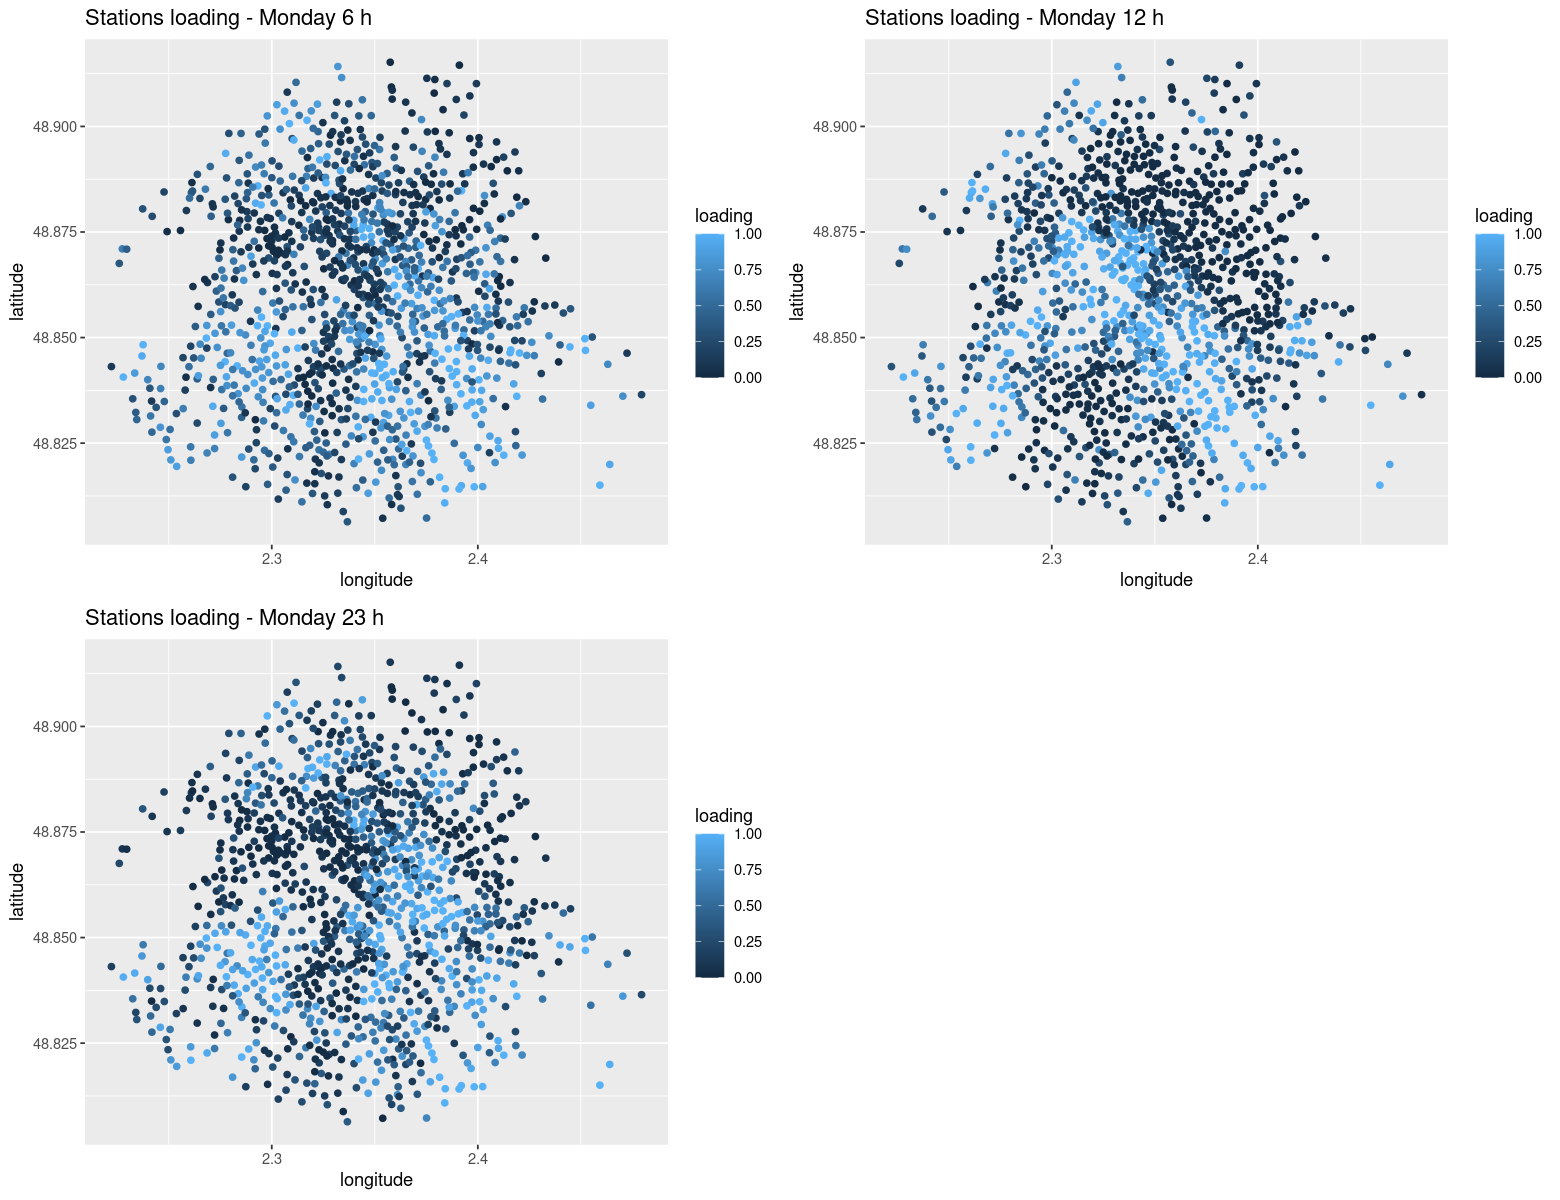

In [97]:
## Simple 2D representation
# Monday at 6h, 12h and 23h

options(repr.plot.width = 13, repr.plot.height = 10)
hours = c(6, 12, 23)

dfi = coord
p = list()
for (i in 1:length(hours)){
    dfi$loading = loading[,hours[i]]
    p[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=loading)) + 
        geom_point() +
        labs(title = paste("Stations loading - Monday",hours[i],"h"))
}

do.call(grid.arrange,c(p, ncol=2))

In [ ]:
# solutions/R/plot_loading_2D_monday.r

> Comments?

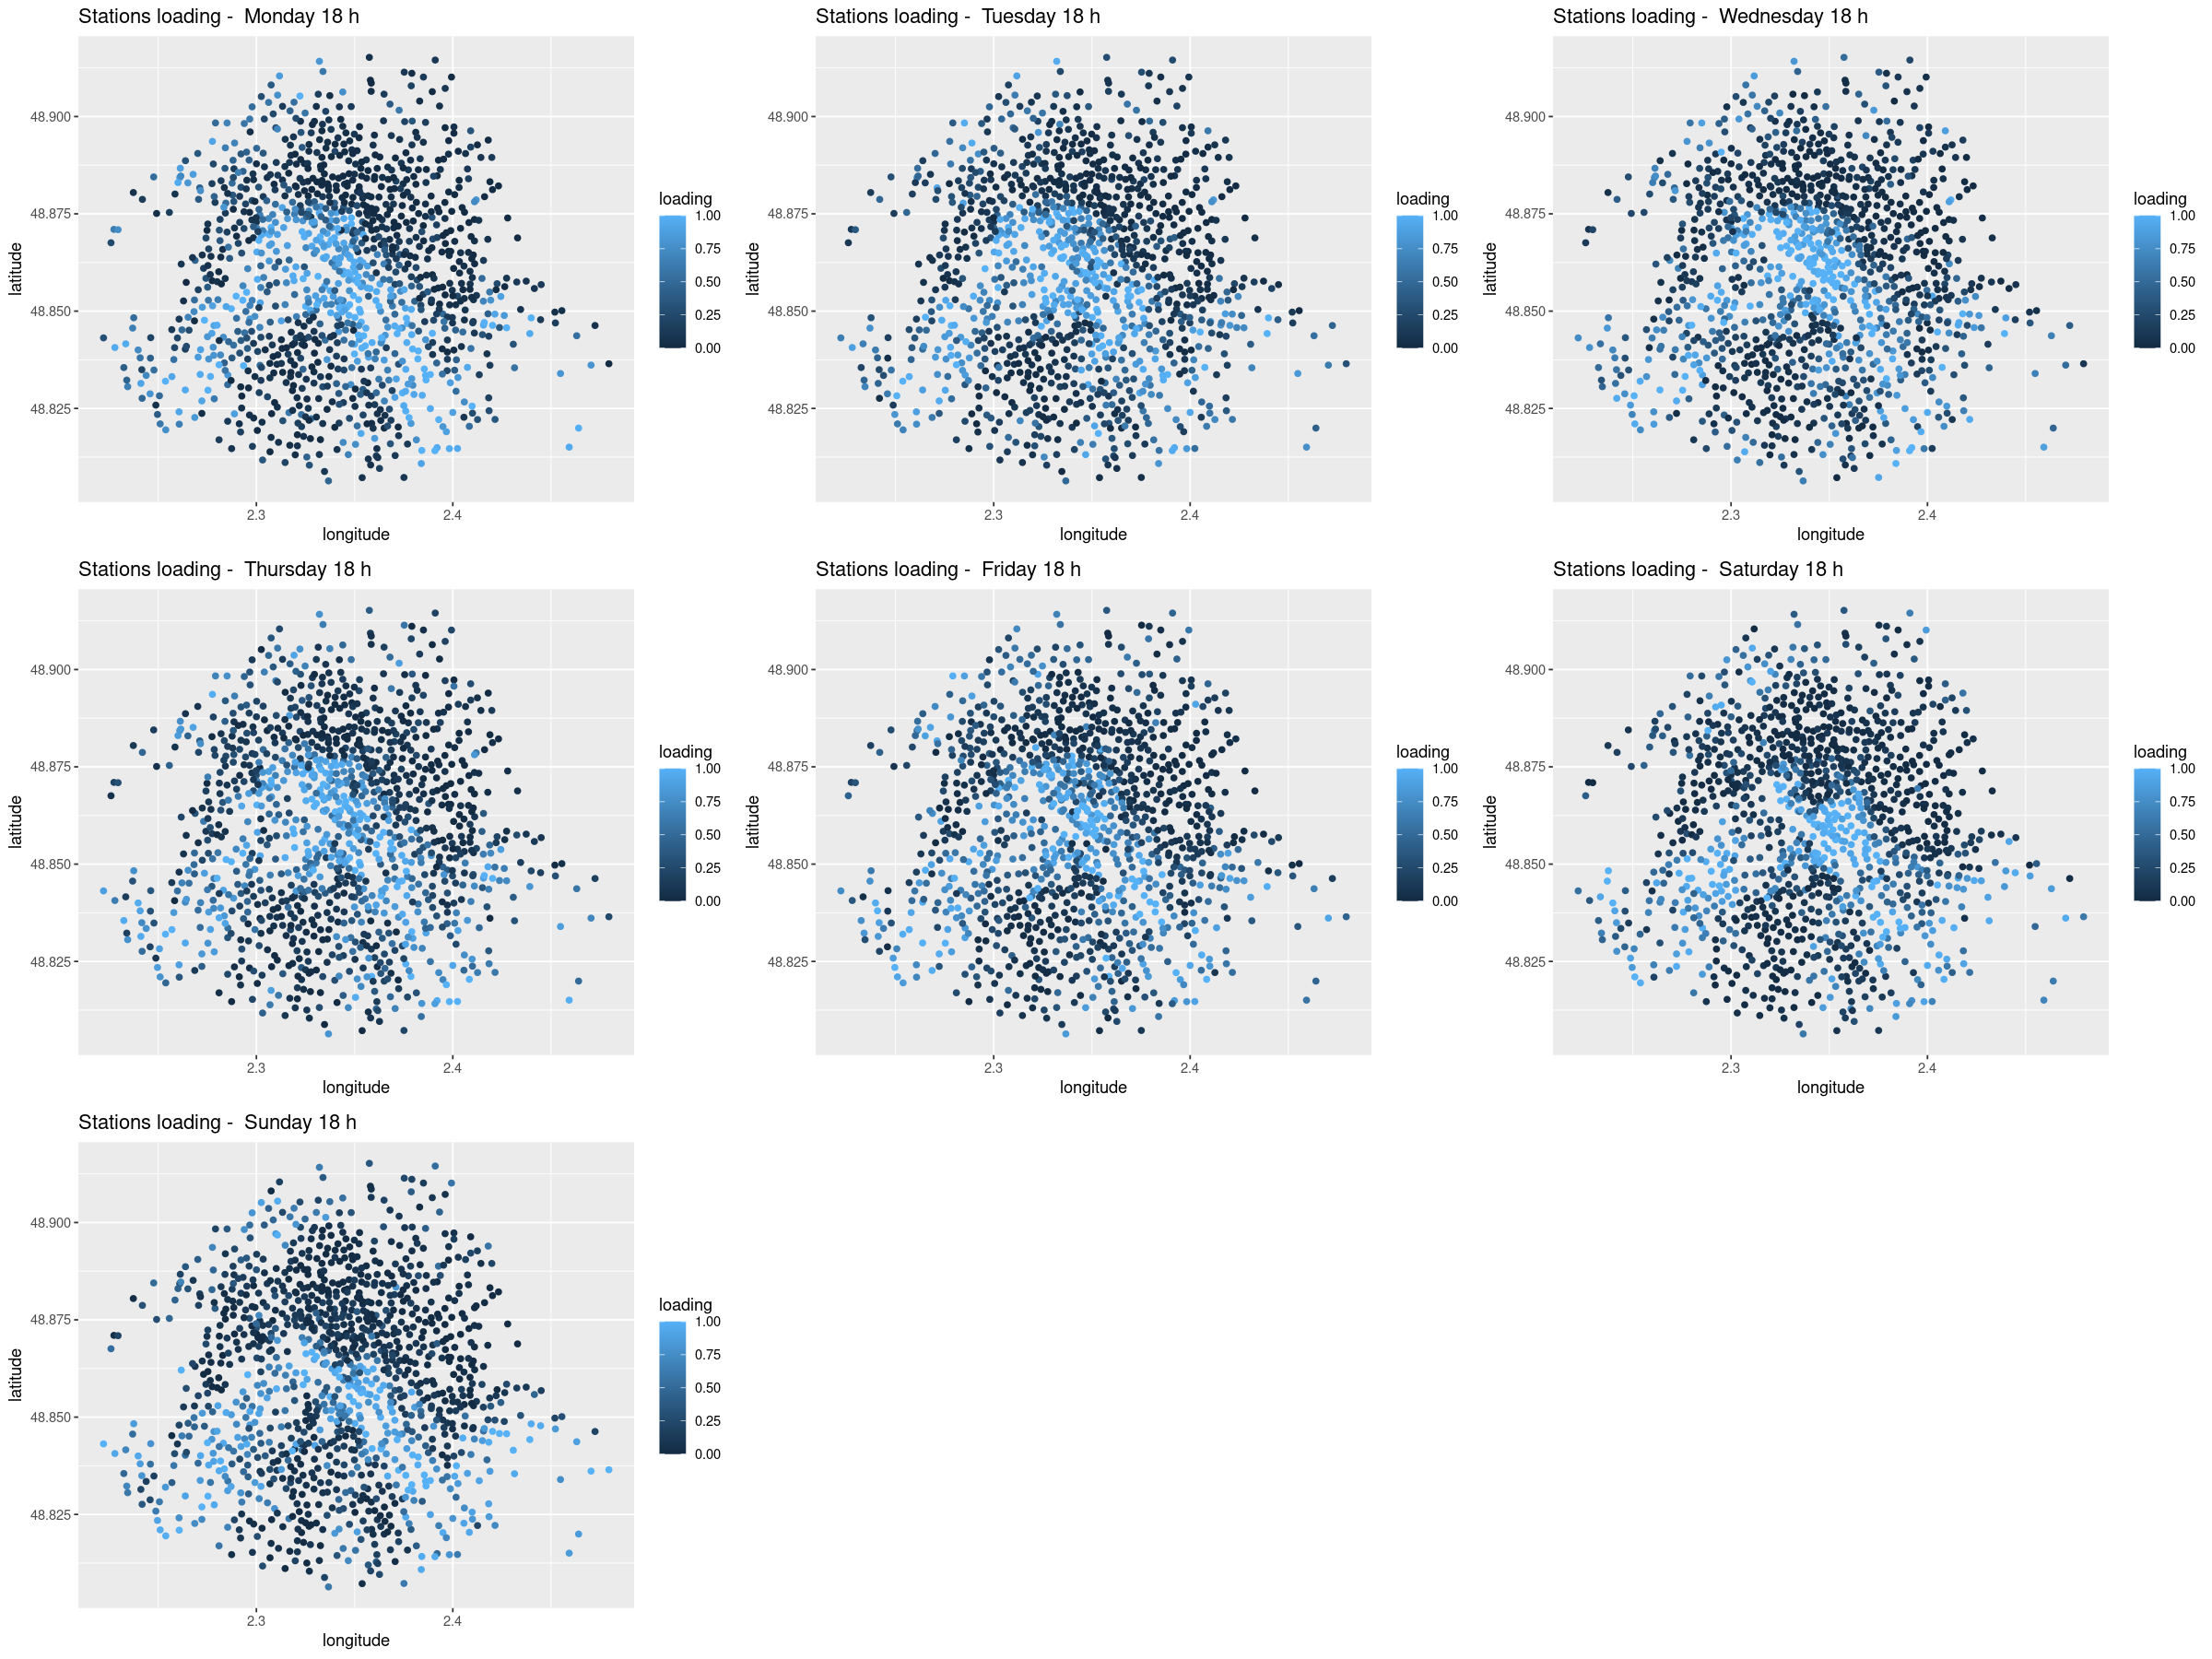

In [98]:
## Simple 2D representation
# Loading at 6pm, depending on the day of the week

options(repr.plot.width = 20, repr.plot.height = 15)

h = 18
hours = seq(h, 168, 24)
days  = list("Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday")

dfi = coord
p = list()
for (i in 1:7){
    dfi$loading = loading[,hours[i]]
    p[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=loading)) + 
        geom_point() +
        labs(title = paste("Stations loading - ", days[i], h,"h"))
}

do.call(grid.arrange,c(p, ncol=3))

In [ ]:
# solutions/R/plot_loading_2D_18h.r

> Comments?

ℹ Replacing old key (7c281d48) with new key in /home/nmai/.Renviron

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



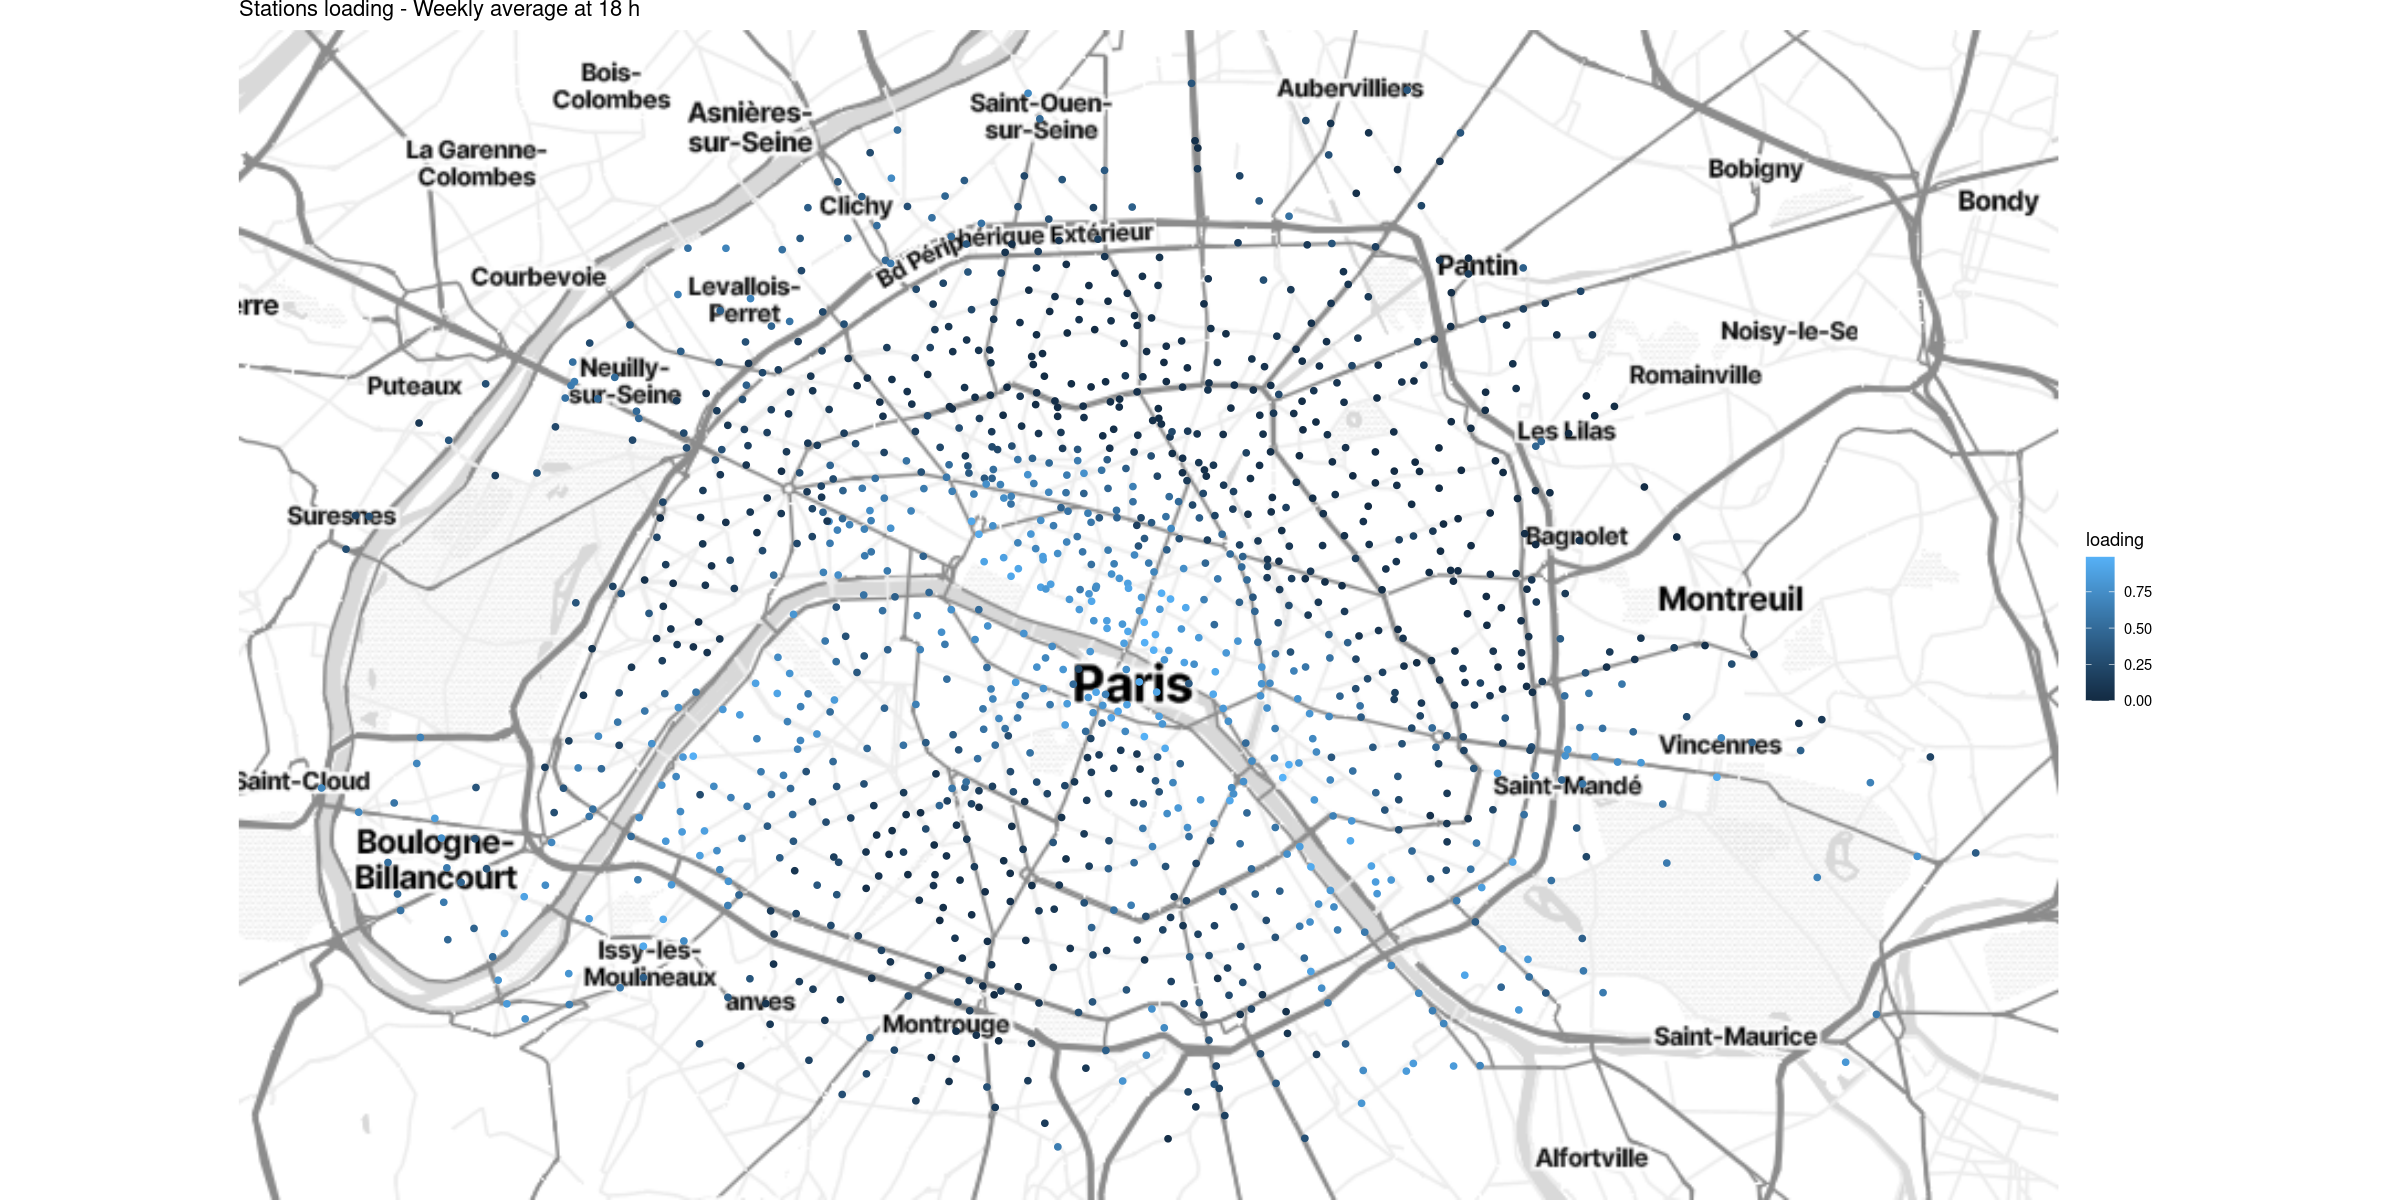

In [103]:
register_stadiamaps("7c281d48-c95f-4746-b57c-e8e5d23a476d", write = TRUE)
h     = 18
hours = seq(h, 168, 24)
load_per_hour = rowMeans(loading[,hours])

df = coord
df$loading = load_per_hour

# --- #

options(repr.plot.width = 20, repr.plot.height = 10)

qmplot(data=df, longitude, latitude, color=loading) +
    labs(title = paste('Stations loading - Weekly average at',h,'h'))

In [ ]:
# solutions/R/plot_loading_map.r

> Comments?

## Influence of Altitude Difference on Station Loading

##### <span style="color:purple"> **Question:** Does Paris have many hilltop stations?</span>

- Compare the number of hilltop stations with the others.

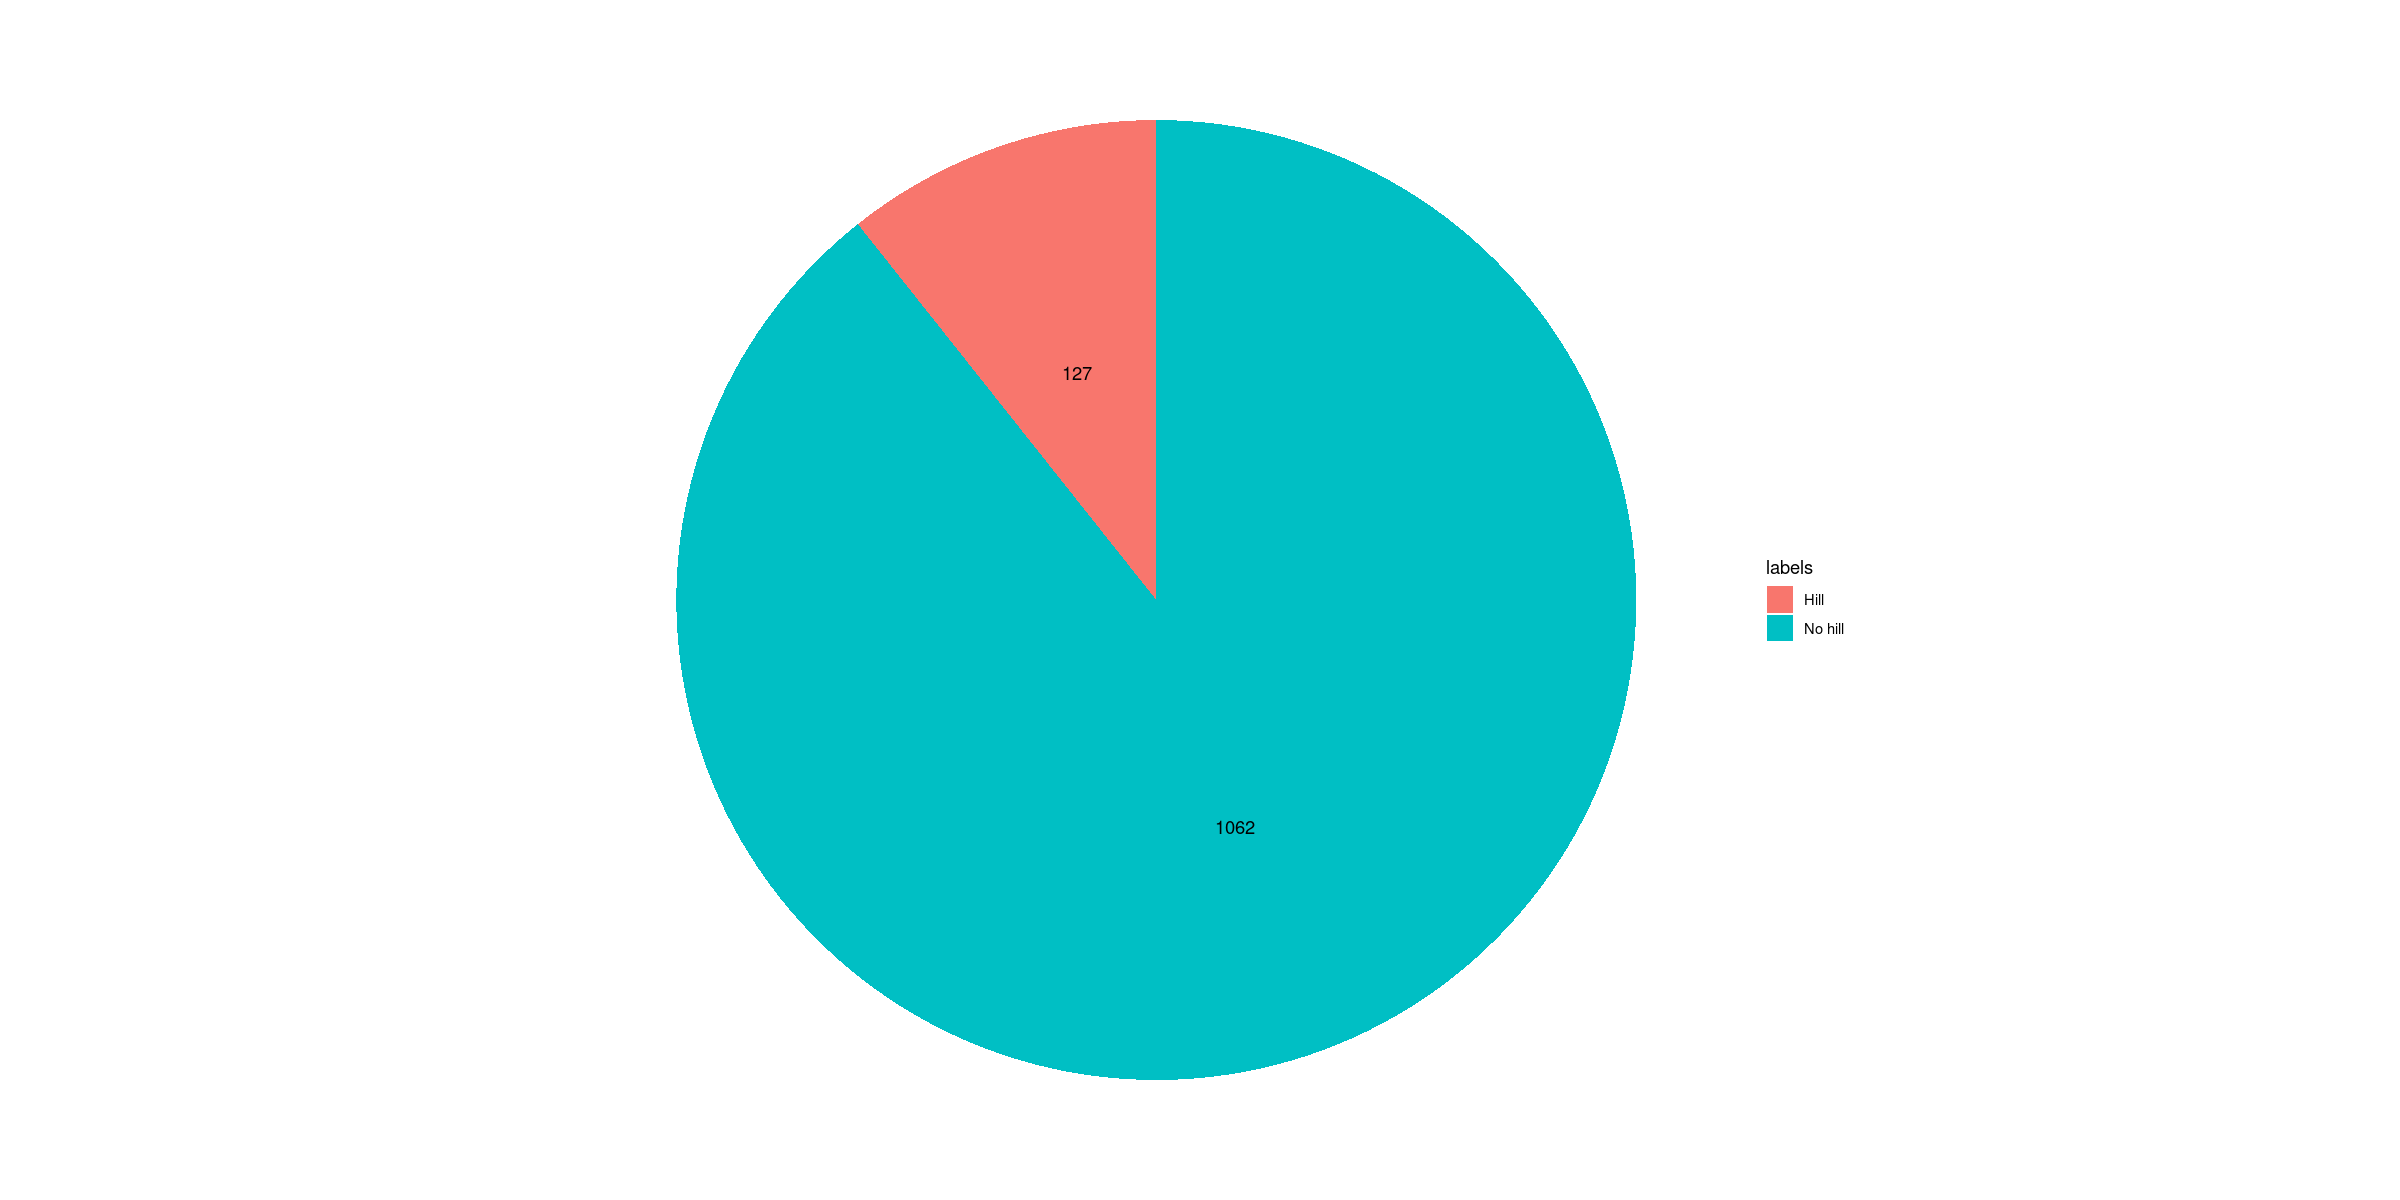

In [104]:
df = data.frame(size=c(sum(coord$bonus==0), sum(coord$bonus==1)),
                labels = c('No hill','Hill'))

ggplot(df, aes(x="", y=size, fill=labels)) +
    geom_bar(stat="identity", width=1) +
    geom_text(aes(label=size), position = position_stack(vjust = 0.5)) +
    coord_polar(theta = "y") +
    scale_color_hue(direction = -1) +  # to reverse the default colormap order
    theme_void()

In [ ]:
# solutions/R/hilltop_stations.r

##### <span style="color:purple"> **Question:** Are hilltop stations more crowded than others?</span>

- Plot the stations coordinates on a 2D map (latitude _vs._ longitude), using a different color for stations which are located on a hill.
- Redo the initial study, but distinguish hilltop stations from others.

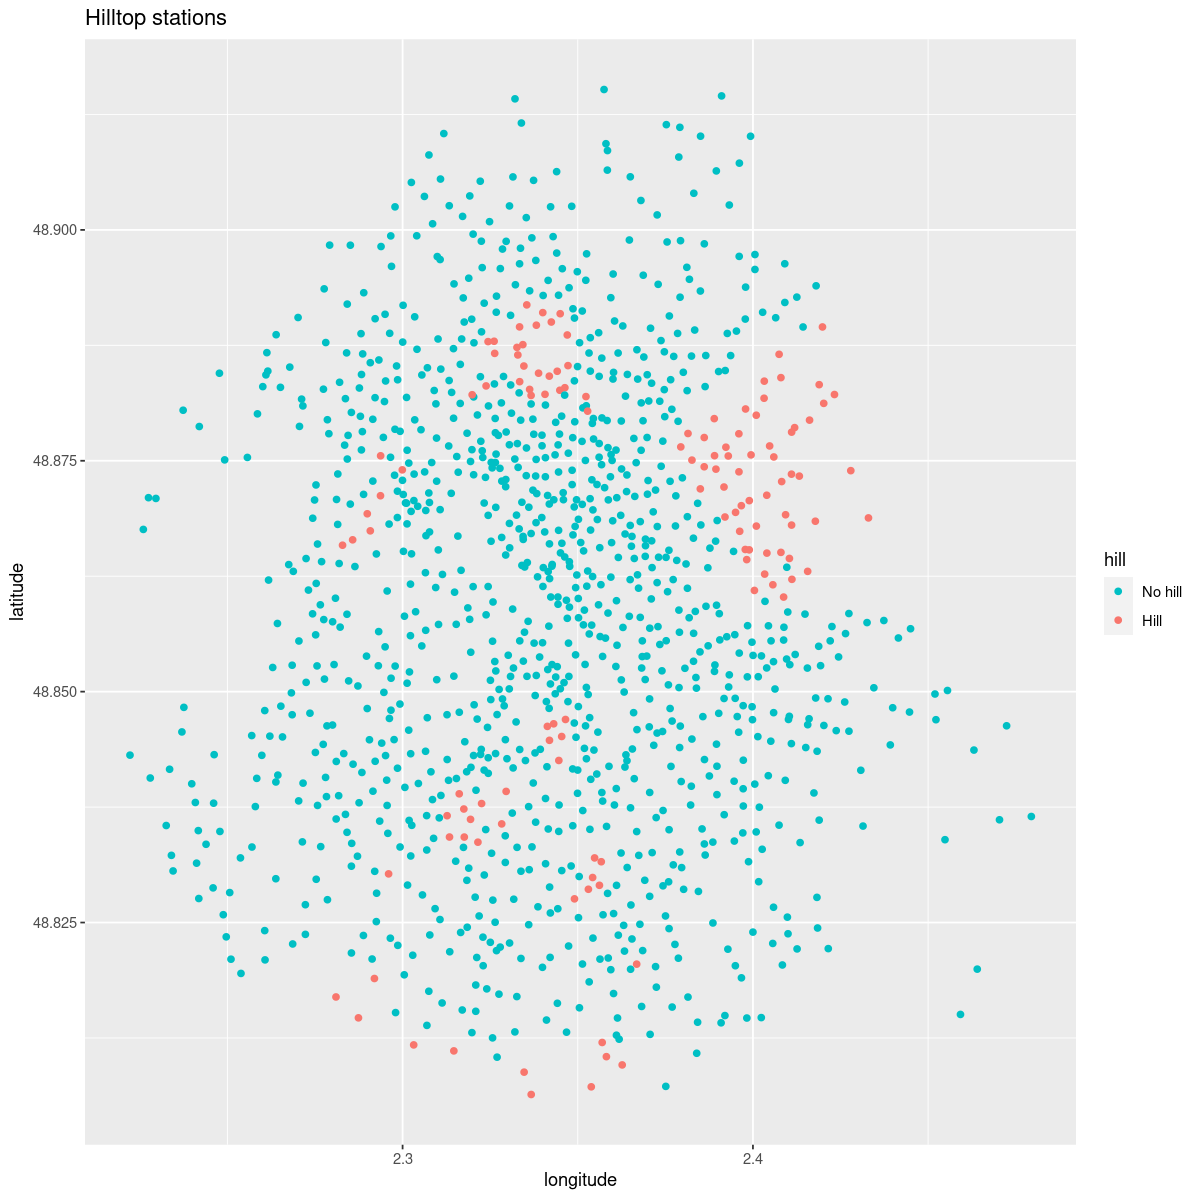

In [105]:
coord$hill = as.factor(coord$bonus)
levels(coord$hill) = c('No hill','Hill')

# --- #

options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(coord, aes(x=longitude, y=latitude, color=hill)) + 
    geom_point() +
    scale_color_hue(direction = -1) +
    labs(title = 'Hilltop stations')

In [ ]:
# solutions/R/hilltop_stations_2D.r

ℹ Using `zoom = 12`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



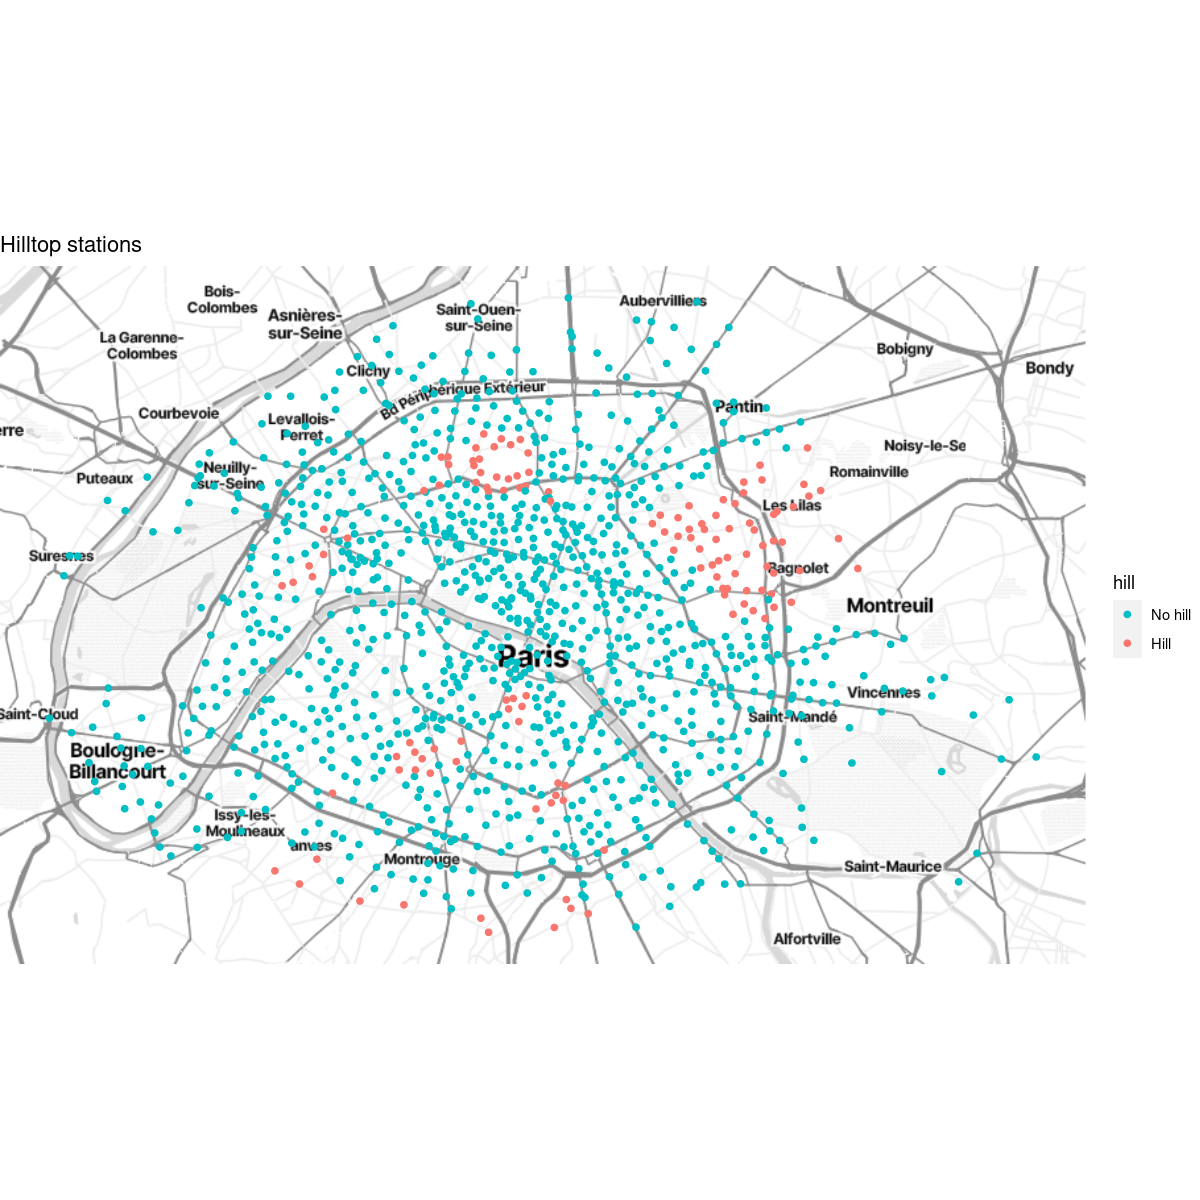

In [106]:
options(repr.plot.width = 10, repr.plot.height = 10)

qmplot(data=coord, longitude, latitude, color=hill) +
    scale_color_hue(direction = -1) +
    labs(title = 'Hilltop stations')

In [ ]:
# solutions/R/hilltop_stations_map.r

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 6)


# --- #

time_tick = 1 + 24*(0:6)  # vector corresponding to the beginning of days
i = sample.int(nrow(loading), 1)
df = melt(loading[i,])  #the function melt reshapes it from wide to long

df$time_range = 1:ncol(loading)

ggplot(df, aes(x=time_range, y=value)) + geom_line(col="darkorchid") +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
    labs(title=velib$names[i])

In [111]:
rows_with_hill <- coord[coord$bonus == 1, which(coord$bonus == 1) ]

# Print the extracted rows
options(repr.plot.width = 15, repr.plot.height = 6)


# --- #
x = rows_with_hill



Using hill as id variables



ERROR: Error in `$<-.data.frame`(`*tmp*`, time_range, value = 1:4): le tableau de remplacement a 4 lignes, le tableau remplacé en a 3


In [137]:
index <- which(coord$bonus == 1) 

load_hill <- loading[index,]
x=load_hill
time_tick = 1 + 24*(0:6)  # vector corresponding to the beginning of days
index
i = sample.int(index, 1)
df = melt(x[i,])  #the function melt reshapes it from wide to long

df$time_range = 1:ncol(x)

ggplot(df, aes(x=time_range, y=value)) + geom_line(col="darkorchid") +
    geom_vline(xintercept=time_tick, col="orange", linetype="dashed") +
    labs(title=velib$names[i])
help(ggplot)

[1]   11   36   46   59   85   89   91  102  106  114  138  140  152  153  188
 [16]  191  204  224  233  247  257  275  302  303  307  326  327  328  329  346
 [31]  348  359  362  384  385  386  394  397  419  422  427  429  436  437  440
 [46]  442  446  450  457  461  463  473  479  480  489  504  518  520  523  524
 [61]  528  554  555  556  595  598  601  604  614  617  618  644  645  651  667
 [76]  669  675  692  713  717  724  726  734  755  762  765  770  806  828  865
 [91]  872  881  905  912  921  930  933  934  940  942  953  957  975  980  982
[106]  991  995  997 1001 1008 1028 1029 1068 1072 1076 1077 1088 1091 1093 1102
[121] 1109 1124 1133 1147 1153 1169 1187

ERROR: Error in sample.int(index, 1): length(n) == 1L n'est pas TRUE


ℹ Using `zoom = 13`

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



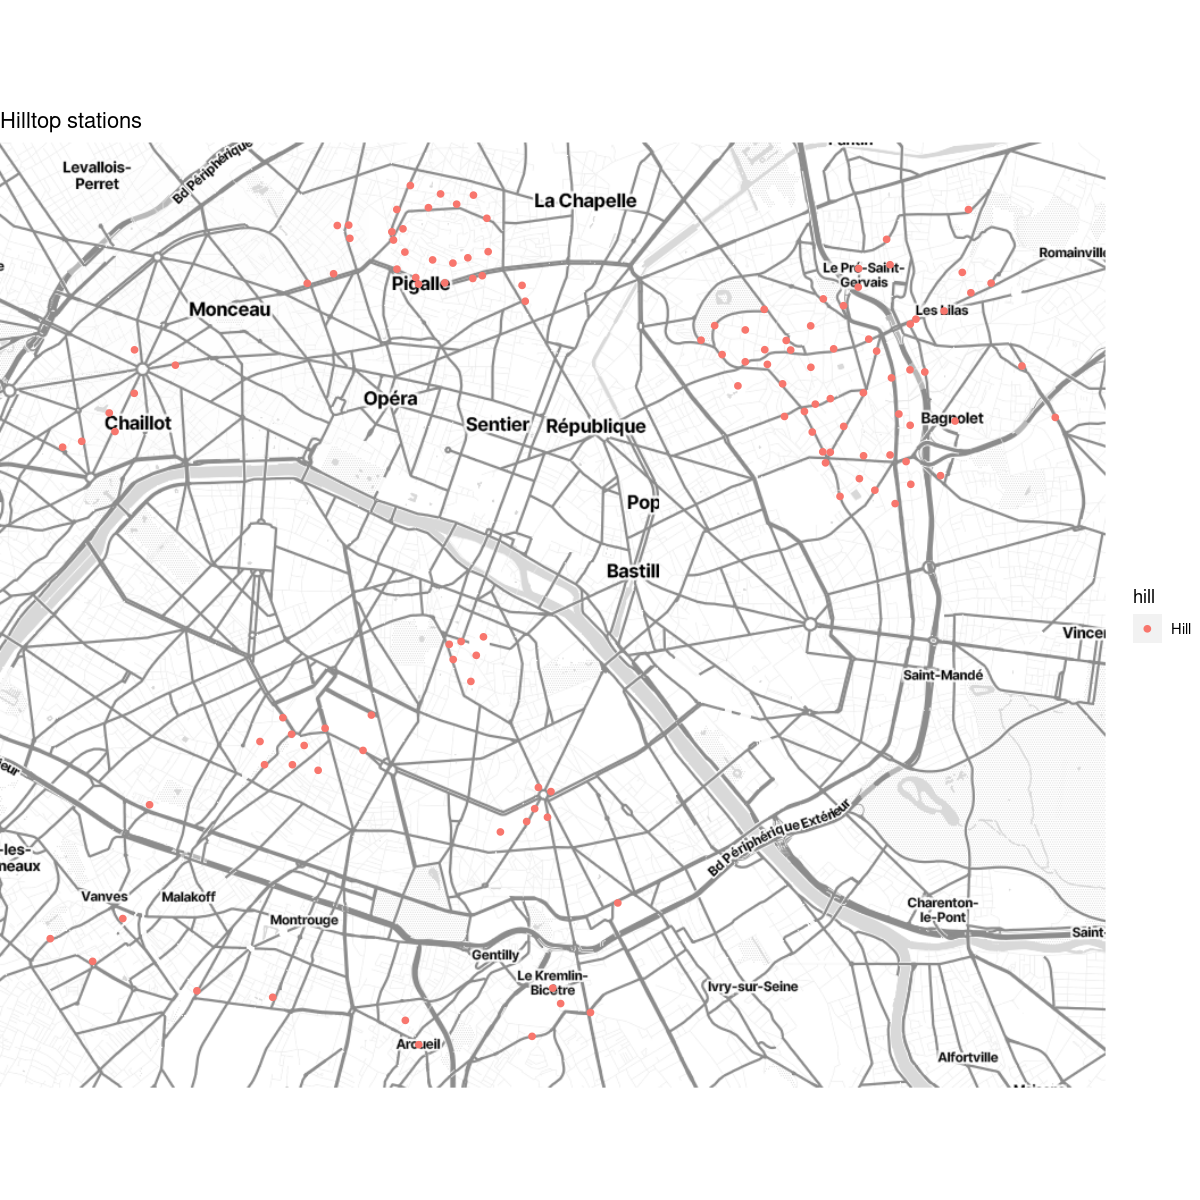

In [129]:
coord_hill <-coord[coord$bonus == 1, ]
options(repr.plot.width = 10, repr.plot.height = 10)

qmplot(data=coord_hill, longitude, latitude, color=hill) +
    scale_color_hue(direction = -1) +
    labs(title = 'Hilltop stations')